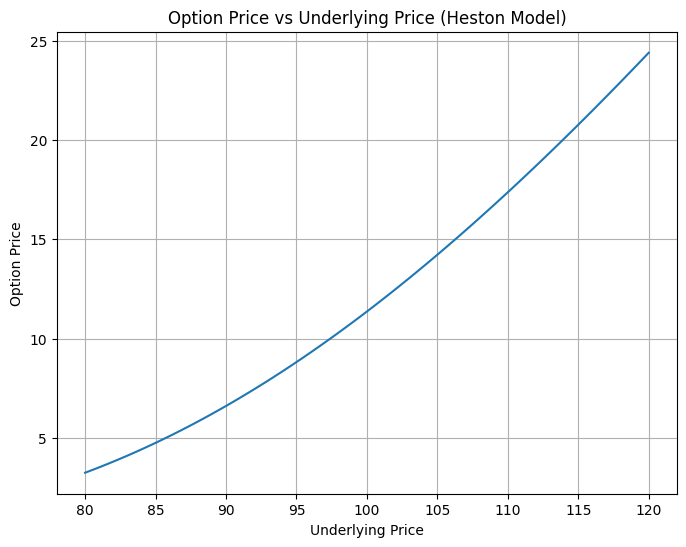

In [13]:
import QuantLib as ql
import matplotlib.pyplot as plt
import numpy as np

# Option parameters
spot_price = 100.0  # Spot price of the underlying asset
strike_price = 105.0  # Strike price of the option
risk_free_rate = 0.05  # Risk-free interest rate
dividend_rate = 0.02  # Dividend yield of the underlying asset
expiration_date = ql.Date(31, 12, 2023)  # Expiration date of the option

# Heston model parameters
v0 = 0.1  # Initial volatility
kappa = 0.2  # Mean reversion speed
theta = 0.1  # Long-term volatility
sigma = 0.1  # Volatility of volatility
rho = -0.5  # Correlation between asset price and volatility

# QuantLib objects
calculation_date = ql.Date(1, 1, 2023)
ql.Settings.instance().evaluationDate = calculation_date

# Define the option
payoff = ql.PlainVanillaPayoff(ql.Option.Call, strike_price)
exercise = ql.EuropeanExercise(expiration_date)
option = ql.VanillaOption(payoff, exercise)

# Define the underlying asset
spot_handle = ql.QuoteHandle(ql.SimpleQuote(spot_price))
flat_ts = ql.YieldTermStructureHandle(
    ql.FlatForward(calculation_date, risk_free_rate, ql.Actual365Fixed())
)
dividend_yield = ql.YieldTermStructureHandle(
    ql.FlatForward(calculation_date, dividend_rate, ql.Actual365Fixed())
)

# Define the Heston process
heston_process = ql.HestonProcess(flat_ts, dividend_yield, spot_handle, v0, kappa, theta, sigma, rho)
engine = ql.AnalyticHestonEngine(ql.HestonModel(heston_process))

# Calculate the option price for a range of underlying prices
underlying_prices = np.linspace(80, 120, 100)
option_prices = []

for price in underlying_prices:
    spot_handle = ql.QuoteHandle(ql.SimpleQuote(price))
    heston_process = ql.HestonProcess(flat_ts, dividend_yield, spot_handle, v0, kappa, theta, sigma, rho)
    option.setPricingEngine(ql.AnalyticHestonEngine(ql.HestonModel(heston_process)))
    option_prices.append(option.NPV())

# Plot the option price as a function of the underlying price
plt.figure(figsize=(8, 6))
plt.plot(underlying_prices, option_prices)
plt.xlabel("Underlying Price")
plt.ylabel("Option Price")
plt.title("Option Price vs Underlying Price (Heston Model)")
plt.grid(True)
plt.show()
